# Machine Learning Nanodegree


## Project: **Stock Price Estimator** 
***
In this project proposal I am going to leverage an ipython notebook for my analysis.

---


## Import Packages

Import all necessary packages initially.

In [73]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.svm import SVR
import random

%matplotlib inline

## Read in the Broadcom(AVGO), Apple(AAPL) and SMH csv files

The spreadhseets were downloaded from Yahoo Finance. They are also part of the capstone project repository.

In [74]:
df = pd.read_csv('./AVGO.csv')
df1 = pd.read_csv('./AAPL.csv')
df2 = pd.read_csv('./SMH.csv')

## Output Some Information from the DataFrame

Below some data items pertaining to Broadcom are presented to see what various columns we have available for the project analysis. We can see below that we have the DAte, Open, High, Low, Close, Volume and Adjusted Close avaialble to us.

In [75]:
df.head(8)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-07,32.369999,32.490002,32.099998,32.320000,29.718203,1682200
1,2013-01-08,32.450001,32.700001,32.090000,32.099998,29.515913,2096900
2,2013-01-09,32.500000,32.959999,32.360001,32.810001,30.168762,2945600
3,2013-01-10,33.459999,33.590000,33.020000,33.520000,30.821594,4459100
4,2013-01-11,33.540001,34.369999,33.490002,34.340000,31.575594,4787100
5,2013-01-14,33.840000,34.619999,33.639999,34.570000,31.787071,4925800
6,2013-01-15,34.299999,34.439999,33.820000,33.869999,31.143423,3373600
7,2013-01-16,33.810001,34.610001,33.770000,34.560001,31.777880,2766900


In [76]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2017-12-29,259.769989,261.950012,256.640015,256.899994,256.899994,1798000
1256,2018-01-02,259.769989,267.500000,257.570007,267.010010,267.010010,3313500
1257,2018-01-03,267.290009,270.730011,266.029999,269.929993,269.929993,3116100
1258,2018-01-04,271.589996,271.760010,268.429993,270.019989,270.019989,1906700
1259,2018-01-05,271.970001,274.260010,269.450012,271.619995,271.619995,2860800


## Reverse all Rows

There is a need to reverse all the rows since the date increases and does not decrease.
The main reason for doing this it aid in seeing the most recent values at the head of the list. In any case, this can easily be reversed again.

In [77]:
df = df.iloc[::-1]

We can now see the most recent values at the top of the data frame

In [78]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1259,2018-01-05,271.970001,274.260010,269.450012,271.619995,271.619995,2860800
1258,2018-01-04,271.589996,271.760010,268.429993,270.019989,270.019989,1906700
1257,2018-01-03,267.290009,270.730011,266.029999,269.929993,269.929993,3116100
1256,2018-01-02,259.769989,267.500000,257.570007,267.010010,267.010010,3313500
1255,2017-12-29,259.769989,261.950012,256.640015,256.899994,256.899994,1798000


In [79]:
df = pd.DataFrame(data = df)
df = df.reset_index()

In [80]:
del df['index']

Observe the latest 7 Opening Stock Prices for Broadcom.

In [81]:
df['Open'][0:7]

0    271.970001
1    271.589996
2    267.290009
3    259.769989
4    259.769989
5    260.160004
6    258.839996
Name: Open, dtype: float64

In [82]:
#Have a look at some summary stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,126.814968,128.224579,125.219714,126.832778,123.054116,2.826507e+06
std,70.608922,71.211349,69.814413,70.579409,70.663921,2.366647e+06
min,31.250000,31.840000,30.570000,31.260000,28.896338,5.761000e+05
25%,63.280001,64.327501,62.465001,63.394999,59.599038,1.741925e+06
50%,124.994999,126.705002,123.065003,125.015000,120.144547,2.329400e+06
75%,171.577503,173.040001,169.659999,171.392505,167.007794,3.203925e+06
max,284.859985,285.679993,279.769989,284.619995,282.745575,5.602800e+07


In [83]:
# This output should have the most recent dates on top
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-05,271.970001,274.260010,269.450012,271.619995,271.619995,2860800
1,2018-01-04,271.589996,271.760010,268.429993,270.019989,270.019989,1906700
2,2018-01-03,267.290009,270.730011,266.029999,269.929993,269.929993,3116100
3,2018-01-02,259.769989,267.500000,257.570007,267.010010,267.010010,3313500
4,2017-12-29,259.769989,261.950012,256.640015,256.899994,256.899994,1798000
5,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100
6,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500
7,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600
8,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700
9,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800


In [84]:
len(df['Open'])

1260

## Save first 1 day worth of data

The First day's worth of data need to be saved. The current day will not be aware of the next day's Adjusted Closing Price. Infact this is something that we will need to predict. 

In [85]:
avgo_first_day= df[0:1].copy(deep = True)

In [86]:
avgo_first_day

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-05,271.970001,274.26001,269.450012,271.619995,271.619995,2860800


## DataFrame with Remaining Data

I have a new data frame with data from entry index 7 onwards.

In [87]:
rem_data = df[1:].copy(deep=True)

## Difference between High and Low Stock Price

This may prove to be a useful metric in the project so have a new column

In [88]:
rem_data['High - Low'] = rem_data['High'] - rem_data['Low']

In [89]:
rem_data.head(8)


,Date,Open,High,Low,Close,Adj Close,Volume,High - Low
1,2018-01-04,271.589996,271.760010,268.429993,270.019989,270.019989,1906700,3.330017
2,2018-01-03,267.290009,270.730011,266.029999,269.929993,269.929993,3116100,4.700012
3,2018-01-02,259.769989,267.500000,257.570007,267.010010,267.010010,3313500,9.929993
4,2017-12-29,259.769989,261.950012,256.640015,256.899994,256.899994,1798000,5.309997
5,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100,2.250000
6,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500,3.109985
7,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600,8.960007
8,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700,4.669983


In [90]:
rem_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low
1255,2013-01-11,33.540001,34.369999,33.490002,34.340000,31.575594,4787100,0.879997
1256,2013-01-10,33.459999,33.590000,33.020000,33.520000,30.821594,4459100,0.570000
1257,2013-01-09,32.500000,32.959999,32.360001,32.810001,30.168762,2945600,0.599998
1258,2013-01-08,32.450001,32.700001,32.090000,32.099998,29.515913,2096900,0.610001
1259,2013-01-07,32.369999,32.490002,32.099998,32.320000,29.718203,1682200,0.390004


## Setup to derive seven ensuing days of data

I have a new column. This will eventually become all my predictions.
Thus, i will have to appropriatley extract "day1 prices" from 1 day ahead to the end minus one day.

In [91]:
day1 = df['Adj Close'][0:-1].copy(deep=True)

In [92]:
day1.head()

0    271.619995
1    270.019989
2    269.929993
3    267.010010
4    256.899994
Name: Adj Close, dtype: float64

## Setup new data frames and reset indices

It is of paramount importance to setup new dataframes and reset indices. Without this it is going to be very tricky to combine the dataframes. It is possible to copy in various ways. However, not doing the correct way will result in nasty warnings despite working. The steps below throw out NO warnings.

In [93]:
d1 = pd.DataFrame(data = day1)

In [94]:
d1 = d1.rename(columns={'Adj Close': 'Day 1'})
d1 = d1.reset_index()


## Delete Index columns

Deleting index columns will make it easy to concat the various individual data frames.

In [95]:
del d1['index']
d1.head()

,Day 1
0,271.619995
1,270.019989
2,269.929993
3,267.010010
4,256.899994


In [96]:
rem_data = rem_data.reset_index()
del rem_data['index']
rem_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low
0,2018-01-04,271.589996,271.760010,268.429993,270.019989,270.019989,1906700,3.330017
1,2018-01-03,267.290009,270.730011,266.029999,269.929993,269.929993,3116100,4.700012
2,2018-01-02,259.769989,267.500000,257.570007,267.010010,267.010010,3313500,9.929993
3,2017-12-29,259.769989,261.950012,256.640015,256.899994,256.899994,1798000,5.309997
4,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100,2.250000


## Concat various data frames to create the AVGO dataframe

The "avgo" dataframe is the data frame that will be used for further analysis in the project.
This updated data frame has the column "Day 1" which will be our target "y" or prediction labels. 

In [97]:
avgo = pd.concat([rem_data,d1], axis = 1, join='inner')

In [98]:
avgo.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low,Day 1
0,2018-01-04,271.589996,271.760010,268.429993,270.019989,270.019989,1906700,3.330017,271.619995
1,2018-01-03,267.290009,270.730011,266.029999,269.929993,269.929993,3116100,4.700012,270.019989
2,2018-01-02,259.769989,267.500000,257.570007,267.010010,267.010010,3313500,9.929993,269.929993
3,2017-12-29,259.769989,261.950012,256.640015,256.899994,256.899994,1798000,5.309997,267.010010
4,2017-12-28,260.160004,260.799988,258.549988,260.420013,260.420013,1364100,2.250000,256.899994
5,2017-12-27,258.839996,261.609985,258.500000,259.119995,259.119995,3561500,3.109985,260.420013
6,2017-12-26,257.230011,262.350006,253.389999,258.100006,258.100006,2225600,8.960007,259.119995
7,2017-12-22,261.820007,263.369995,258.700012,262.350006,262.350006,1461700,4.669983,258.100006
8,2017-12-21,265.950012,266.250000,261.070007,261.529999,261.529999,1775800,5.179993,262.350006
9,2017-12-20,266.140015,266.350006,262.779999,265.640015,265.640015,1984500,3.570007,261.529999


## Display Some Plots

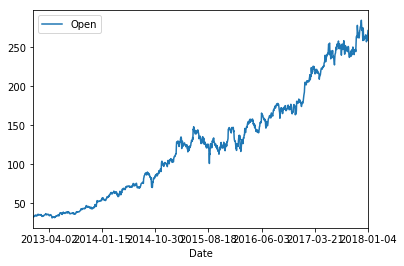

In [99]:
avgo.plot(x = 'Date', y = 'Open')
plt.gca().invert_xaxis()
plt.show()

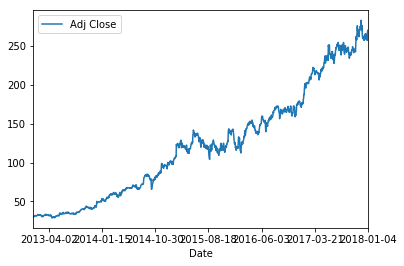

In [100]:
avgo.plot(x = 'Date', y = 'Adj Close')
plt.gca().invert_xaxis()
plt.show()

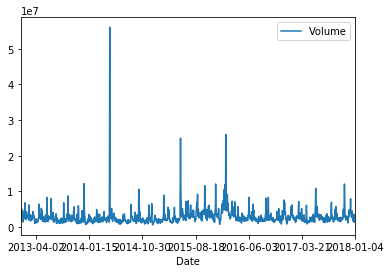

In [101]:
avgo.plot(x = 'Date', y = 'Volume')
plt.gca().invert_xaxis()
plt.show()

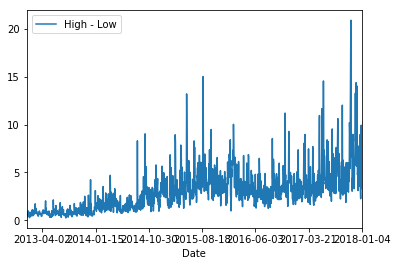

In [102]:
avgo.plot(x = 'Date', y = 'High - Low')
plt.gca().invert_xaxis()
plt.show()

In [29]:
avgo = avgo.iloc[::-1]
avgo = avgo.reset_index()
del avgo['index']

avgo.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High - Low,Day 1
0,2013-01-07,32.369999,32.490002,32.099998,32.320000,29.718203,1682200,0.390004,29.515913
1,2013-01-08,32.450001,32.700001,32.090000,32.099998,29.515913,2096900,0.610001,30.168762
2,2013-01-09,32.500000,32.959999,32.360001,32.810001,30.168762,2945600,0.599998,30.821594
3,2013-01-10,33.459999,33.590000,33.020000,33.520000,30.821594,4459100,0.570000,31.575594
4,2013-01-11,33.540001,34.369999,33.490002,34.340000,31.575594,4787100,0.879997,31.787071


In [30]:
y = avgo['Day 1'].values


In [31]:
X = avgo[['Open','Volume','Adj Close','High']].as_matrix()

In [32]:
X_train = X[0:1258]
X_test  = X[1258:1259]
y_train = y[0:1258]
y_test  = y[1258:1259]

In [33]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))


Root Mean squared error: 1.40


In [34]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 151.54


In [35]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 8.90


In [36]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 1.05


In [37]:
def split_data(X, y, start, end):
    return X[start:end], y[start:end], X[end:end+1], y[end:end+1]

In [38]:
X_train, y_train, X_test, y_test = split_data(X, y, 0, 1258)

In [39]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 8.90


In [40]:
clf = RandomForestRegressor(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 1.05


In [41]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 151.54


In [42]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

#print(y_pred, y_test)

# The root mean squared error
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 1.40


In [43]:
# Do Time Series Split
tscv = TimeSeriesSplit(n_splits = 10)
tscv.split(X_train,y_train)

# Create a decision tree regressor object
regr = DecisionTreeRegressor()

# Params to Search
params = {'max_features':['auto'], 'max_depth': [5,7,9,11,13,15,17]}

# Peform Grid Search
grid = GridSearchCV(regr, params, cv=tscv)

# Fit The Data
grid = grid.fit(X_train,y_train)

# Find Optimal Model
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
#print(y_pred, y_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 8.90


In [45]:
# Do Time Series Split
tscv = TimeSeriesSplit(n_splits = 10)
tscv.split(X_train,y_train)

# Create a Random Forest regressor object
regr = RandomForestRegressor(n_estimators = 20, random_state = 21)

# Create a dictionary for the parameter 'max_depth' with a range from 1 to 100
params = {'min_samples_leaf':range(1,10)}

# Peform Grid Searcht
grid = GridSearchCV(regr, params, cv=tscv)

# Fit The Dat
grid = grid.fit(X_train,y_train)

# Find Optimal Model
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=21, verbose=0, warm_start=False)

In [46]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
#print(y_pred, y_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 1.68


In [47]:
df1 = df1.rename(columns={'Adj Close': 'AAPL Adj Close'})
#df1 = df1.reset_index()
df2 = df2.rename(columns={'Adj Close': 'SMH Adj Close'})
#df2 = df2.reset_index()

In [48]:
aapl = df1['AAPL Adj Close']
smh = df2['SMH Adj Close']

In [49]:
aapl = pd.DataFrame(data = aapl)
smh = pd.DataFrame(data = smh)

aapl = aapl.reset_index()
del aapl['index']
smh = smh.reset_index()
del smh['index']

In [50]:
aapl.head()


,AAPL Adj Close
0,67.687439
1,67.869614
2,66.808876
3,67.637062
4,67.222336


In [51]:
smh.head()

,SMH Adj Close
0,31.319054
1,31.007280
2,30.638823
3,31.867022
4,32.018181


In [52]:
aapl.tail()

,AAPL Adj Close
1255,169.229996
1256,172.259995
1257,172.229996
1258,173.029999
1259,175.000000


In [53]:
smh.tail()

,SMH Adj Close
1255,97.809998
1256,100.370003
1257,101.790001
1258,102.309998
1259,102.970001


In [54]:
avgo_enhanced = pd.concat([avgo,aapl,smh], axis = 1, join='inner')
#del avgo_enhanced['index']

In [55]:
avgo_enhanced.head()


,Date,Open,High,Low,Close,Adj Close,Volume,High - Low,Day 1,AAPL Adj Close,SMH Adj Close
0,2013-01-07,32.369999,32.490002,32.099998,32.320000,29.718203,1682200,0.390004,29.515913,67.687439,31.319054
1,2013-01-08,32.450001,32.700001,32.090000,32.099998,29.515913,2096900,0.610001,30.168762,67.869614,31.007280
2,2013-01-09,32.500000,32.959999,32.360001,32.810001,30.168762,2945600,0.599998,30.821594,66.808876,30.638823
3,2013-01-10,33.459999,33.590000,33.020000,33.520000,30.821594,4459100,0.570000,31.575594,67.637062,31.867022
4,2013-01-11,33.540001,34.369999,33.490002,34.340000,31.575594,4787100,0.879997,31.787071,67.222336,32.018181


In [56]:
X = avgo_enhanced[['Open','Volume','Adj Close', 'High', 'SMH Adj Close', 'AAPL Adj Close']].as_matrix()

In [57]:
y = avgo_enhanced['Day 1'].values

In [58]:
X_train, y_train, X_test, y_test = split_data(X, y, 0, 1258)

In [59]:
# Do Time Series Split
tscv = TimeSeriesSplit(n_splits = 10)
tscv.split(X_train,y_train)

# Create a decision tree regressor object
regr = DecisionTreeRegressor()

# Params to Search
params = {'max_features':['auto']}

# Peform Grid Search
grid = GridSearchCV(regr, params, cv=tscv)

# Fit The Data
grid = grid.fit(X_train,y_train)

# Find Optimal Model
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [60]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
#print(y_pred, y_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 8.90


In [61]:
# Do Time Series Split
tscv = TimeSeriesSplit(n_splits = 10)
tscv.split(X_train,y_train)

# Create a Random Forest regressor object
regr = KNeighborsRegressor()

# Create a dictionary for the parameter 'max_depth' with a range from 1 to 100
params = {'n_neighbors':range(1,3)}

# Peform Grid Searcht
grid = GridSearchCV(regr, params, cv=tscv)

# Fit The Dat
grid = grid.fit(X_train,y_train)

# Find Optimal Model
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [62]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
#print(y_pred, y_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 152.74


In [63]:
# Do Time Series Split
tscv = TimeSeriesSplit(n_splits = 10)
tscv.split(X_train,y_train)

# Create a Random Forest regressor object
regr = linear_model.SGDRegressor(max_iter = 100)
# Create a dictionary for the parameter 'max_depth' with a range from 1 to 100
params = {'loss':['squared_loss','huber'],'penalty':['none','l2','l1'],'alpha':[.0001,.001,.01,.1]}

# Peform Grid Searcht
grid = GridSearchCV(regr, params, cv=tscv)

# Fit The Dat
grid = grid.fit(X_train,y_train)

# Find Optimal Model
grid.best_estimator_

SGDRegressor(alpha=0.1, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', max_iter=100, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [64]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
#print(y_pred, y_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 282424584.55


In [65]:
def rfr(X, y):
    # Do Time Series Split
    tscv = TimeSeriesSplit(n_splits = 10)
    tscv.split(X_train,y_train)
    
    # Create a Random Forest regressor object
    regr = RandomForestRegressor(n_estimators = 20, random_state = 21)
    #regr = RandomForestRegressor(n_estimators = 20, random_state = 13, max_leaf_nodes = 40)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 100
    params = {'min_samples_leaf':range(1,10)}

    # Peform Grid Searcht
    grid = GridSearchCV(regr, params, cv=tscv)

    # Fit The Dat
    grid = grid.fit(X_train,y_train)

    # Find Optimal Model
    return grid.best_estimator_

In [66]:
random.seed(15345)
X_train, y_train, X_test, y_test = split_data(X, y, 0, 1258)
model = rfr(X_train, y_train)

y_pred = model.predict(X_test)
#print(y_pred, y_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))

Root Mean squared error: 0.42


In [67]:
print(model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=21, verbose=0, warm_start=False)


In [68]:
diff = 0

for i in range(20):
    X_train, y_train, X_test, y_test = split_data(X, y, 0, 1258 -i)
    y_pred = model.predict(X_test)
    diff += pow((y_test - y_pred), 2)
    print("Predicted and Actual Price on Day - %d" %i, y_test, y_pred)

print(sqrt(diff)/20)



Predicted and Actual Price on Day - 0 [ 271.619995] [ 271.20489192]
Predicted and Actual Price on Day - 1 [ 270.019989] [ 268.90435509]
Predicted and Actual Price on Day - 2 [ 269.929993] [ 265.68010862]
Predicted and Actual Price on Day - 3 [ 267.01001] [ 264.46270181]
Predicted and Actual Price on Day - 4 [ 256.899994] [ 258.85417528]
Predicted and Actual Price on Day - 5 [ 260.420013] [ 259.00821043]
Predicted and Actual Price on Day - 6 [ 259.119995] [ 257.74046276]
Predicted and Actual Price on Day - 7 [ 258.100006] [ 260.15236121]
Predicted and Actual Price on Day - 8 [ 262.350006] [ 261.6422918]
Predicted and Actual Price on Day - 9 [ 261.529999] [ 262.84641172]
Predicted and Actual Price on Day - 10 [ 265.640015] [ 265.10662126]
Predicted and Actual Price on Day - 11 [ 263.700012] [ 263.59596252]
Predicted and Actual Price on Day - 12 [ 264.390015] [ 263.59694788]
Predicted and Actual Price on Day - 13 [ 263.980011] [ 262.77926672]
Predicted and Actual Price on Day - 14 [ 257.6